In [45]:
'''>>>>> start CodeP3.1.2F21
    V.P. Carey ME249, Fall 2021

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]]
xarray= np.array(xdata)

# define meadian values of input variables - add your values here
Tamed = np.median(xarray[:,0])  #make sure Tamed does not = 0
IDmed = np.median(xarray[:,1])
RLmed = np.median(xarray[:,2])

#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
#xdata = [[-10.0, 350, 4.464]] 
#xdata.append([-10.0, 650, 4.464]) 
#xdata.append([-10.0, 950, 4.464]) 
#xdata.append([-10.0, 1250, 4.464])
''' ADD THE REST OF THE INPUT DATA AND CONVERT TO:
xdata = [[-10.0/Tamed, 350/IDmed, 4.464/RLmed]] 
xdata.append([-10.0/Tamed, 650/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 950/IDmed, 4.464/RLmed]) 
xdata.append([-10.0/Tamed, 1250/IDmed, 4.464/RLmed]) 
... etc.'''
for i in range(xarray.shape[0]):
    xarray[i,0] = (xarray[i,0]/Tamed)
    xarray[i,1] = (xarray[i,1]/IDmed)
    xarray[i,2] = (xarray[i,2]/RLmed)

print (xdata)
print (xarray)

#create input data array
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]]

yarray= np.array(ydata)

# define meadian values of input variables - add your values here
VLmed = np.median(yarray[:,0])
Wdmed = np.median(yarray[:,1])


#Part 1 output data: VL (V) and Power out Wd (W)
#ydata = [[18.9, 80.3]] 
#ydata.append([23.5, 124.6]) 
#ydata.append([24.8, 138.6]) 
#ydata.append([25.6, 146.9]) 
''' ADD THE REST OF THE OUPUT DATA AND CONVERT TO:
ydata = [[18.9/VLmed, 80.3/Wdmed]] 
ydata.append([23.5/VLmed, 124.6/Wdmed]) 
ydata.append([24.8/VLmed, 138.6/Wdmed]) 
ydata.append([25.6/VLmed, 146.9/Wdmed]) 
... etc.'''

for i in range(yarray.shape[0]):
    yarray[i,0] = (yarray[i,0]/VLmed)
    yarray[i,1] = (yarray[i,1]/Wdmed)
    


#print (ydata)
#print (yarray)

[[-10.0, 350, 4.464], [-10.0, 650, 4.464], [-10.0, 950, 4.464], [-10.0, 1250, 4.464], [10.0, 350, 4.464], [10.0, 650, 4.464], [10.0, 950, 4.464], [10.0, 1250, 4.464], [30.0, 350, 4.464], [30.0, 650, 4.464], [30.0, 950, 4.464], [30.0, 1250, 4.464], [-10.0, 350, 6.696], [-10.0, 650, 6.696], [-10.0, 950, 6.696], [-10.0, 1250, 6.696], [10.0, 350, 6.696], [10.0, 650, 6.696], [10.0, 950, 6.696], [10.0, 1250, 6.696], [30.0, 350, 6.696], [30.0, 650, 6.696], [30.0, 950, 6.696], [30.0, 1250, 6.696], [-10.0, 350, 8.928], [-10.0, 650, 8.928], [-10.0, 950, 8.928], [-10.0, 1250, 8.928], [10.0, 350, 8.928], [10.0, 650, 8.928], [10.0, 950, 8.928], [10.0, 1250, 8.928], [30.0, 350, 8.928], [30.0, 650, 8.928], [30.0, 950, 8.928], [30.0, 1250, 8.928]]
[[-1.          0.4375      0.66666667]
 [-1.          0.8125      0.66666667]
 [-1.          1.1875      0.66666667]
 [-1.          1.5625      0.66666667]
 [ 1.          0.4375      0.66666667]
 [ 1.          0.8125      0.66666667]
 [ 1.          1.1875   

In [46]:
x_train, x_test, y_train, y_test = train_test_split(xarray, yarray,test_size=0.33)

In [47]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)
#initializer = keras.initializers.RandomUniform(minval= -1.2, maxval=1.2)


model = keras.Sequential([
    keras.layers.Dense(6, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu,  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])


In [48]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.02)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [49]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Restoring model weights from the end of the best epoch
Epoch 00612: early stopping
best epoch =  532
smallest loss = 0.03945270925760269


In [50]:
rms = keras.optimizers.RMSprop(0.01)
model.compile(loss='mean_absolute_error',optimizer=rms)
historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)
loss_hist = historyData.history['loss']
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Restoring model weights from the end of the best epoch
Epoch 00160: early stopping
best epoch =  80
smallest loss = 0.029605338349938393


In [51]:
rms = keras.optimizers.RMSprop(0.005)
model.compile(loss='mean_absolute_error',optimizer=rms)
historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)
loss_hist = historyData.history['loss']
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Restoring model weights from the end of the best epoch
Epoch 00160: early stopping
best epoch =  80
smallest loss = 0.02120303548872471


In [52]:
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)
historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)
loss_hist = historyData.history['loss']
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

best epoch =  1166
smallest loss = 0.006586755160242319


In [53]:
# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.


### (e)

Calcualated mae on training predictions  0.008278178461972195


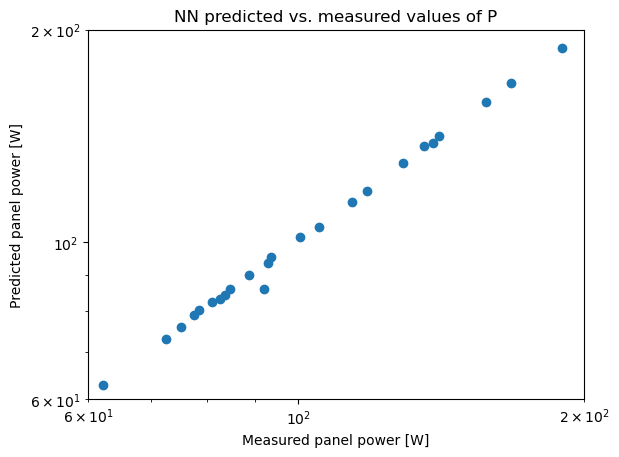

In [54]:
 #Predict train values
trainpred = model.predict(x_train)

maetrain= np.abs(np.subtract(y_train, trainpred)).mean() 
print ('Calcualated mae on training predictions ', maetrain)

#Plot
fig = plt.figure()
plt.scatter(y_train[:,1]*Wdmed, trainpred[:,1]*Wdmed)
plt.title(r'NN predicted vs. measured values of P')
plt.ylabel(r'Predicted panel power [W]')
plt.xlabel(r'Measured panel power [W]')
plt.loglog()
plt.xlim(xmax = 200, xmin = 60)
plt.ylim(ymax = 200, ymin = 60)
plt.show()
fig.savefig('figures/fig3part1_2e.pdf')

### (f)

calcualated mae on testdata 0.03898364918329075


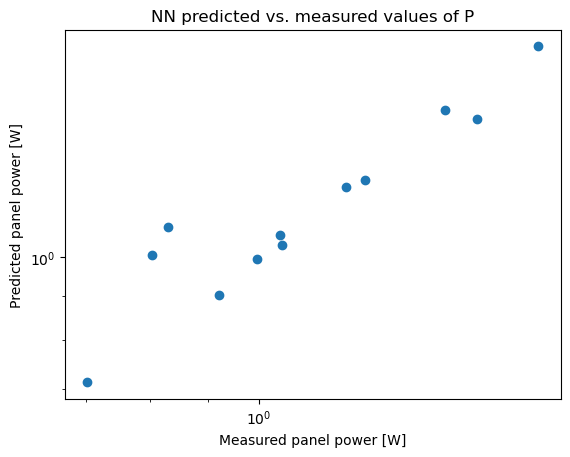

In [55]:
#Predict test values
testpred = model.predict(x_test)

maetest= np.abs(np.subtract(y_test, testpred)).mean() 
print ('calcualated mae on testdata', maetest)

#Plot
fig = plt.figure()
plt.scatter(y_test[:,1], testpred[:,1])
plt.title(r'NN predicted vs. measured values of P')
plt.ylabel(r'Predicted panel power [W]')
plt.xlabel(r'Measured panel power [W]')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()
fig.savefig('figures/fig3part1_2f.pdf')

### (g)

In [56]:
xdata2 = [[-10.0, 1550, 4.464], 
  [-10.0, 1850, 4.464], 
  [10.0, 1550, 4.464], 
  [10.0, 1850, 4.464], 
  [30.0, 1550, 4.464], 
  [30.0, 1850, 4.464], 
  [-10.0, 1550, 6.696], 
  [-10.0, 1850, 6.696], 
  [10.0, 1550, 6.696], 
  [10.0, 1850, 6.696], 
  [30.0, 1550, 6.696], 
  [30.0, 1850, 6.696], 
  [-10.0, 1550, 8.928], 
  [-10.0, 1850, 8.928],   
  [10.0, 1550, 8.928], 
  [10.0, 1850, 8.928], 
  [30.0, 1550, 8.928], 
  [30.0, 1850, 8.928]]
xarray2= np.array(xdata2)

# define meadian values of input variables - add your values here
Tamed2 = np.median(xarray2[:,0])  #make sure Tamed does not = 0
IDmed2 = np.median(xarray2[:,1])
RLmed2 = np.median(xarray2[:,2])
for i in range(xarray2.shape[0]):
    xarray2[i,0] = (xarray2[i,0]/Tamed2)
    xarray2[i,1] = (xarray2[i,1]/IDmed2)
    xarray2[i,2] = (xarray2[i,2]/RLmed2)
    
#Part 1 output HI FLUX DATA: load voltage (V) and Power out (W)
ydata2 = [[26.1, 152.8], 
 [26.5, 172.7], 
 [27.9, 191.4], 
 [28.3, 198.0], 
 [29.6, 217.8], 
 [30.1, 224.4],  
 [26.9, 118.8], 
 [27.2, 122.1], 
 [28.8, 136.4], 
 [29.1, 139.7], 
 [30.6, 154.0], 
 [31.0, 158.4],  
 [27.3, 92.4], 
 [27.6, 94.6], 
 [29.2, 105.6], 
 [29.6, 107.8], 
 [31.1, 119.9], 
 [31.5, 123.2]]


yarray2= np.array(ydata2)

# define meadian values of input variables - add your values here
VLmed2 = np.median(yarray2[:,0])
Wdmed2 = np.median(yarray2[:,1])


for i in range(yarray2.shape[0]):
    yarray2[i,0] = (yarray2[i,0]/VLmed2)
    yarray2[i,1] = (yarray2[i,1]/Wdmed2)

calcualated mae on training predictions  0.05869079182288633


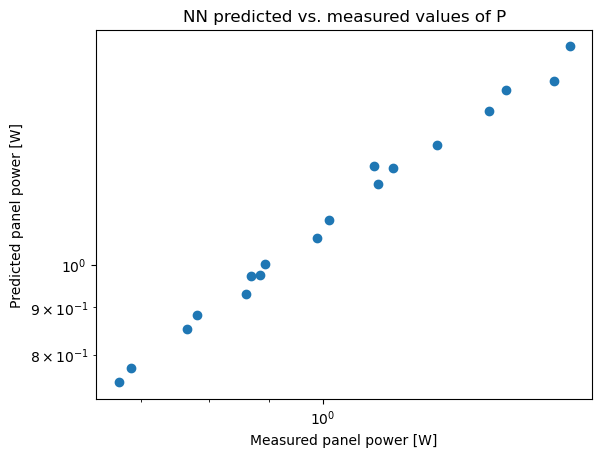

In [57]:
#Predict values for new dataset
newpred = model.predict(xarray2)

maenew= np.abs(np.subtract(yarray2, newpred)).mean() 
print ('calcualated mae on training predictions ', maenew)

#Plot
fig = plt.figure()
plt.scatter(yarray2[:,1], newpred[:,1])
plt.title(r'NN predicted vs. measured values of P')
plt.ylabel(r'Predicted panel power [W]')
plt.xlabel(r'Measured panel power [W]')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()
fig.savefig('figures/fig3part1_2g.pdf')

### (h)

In [58]:
#create a surface plot of P for Tair=20
precision = 50 #number of data points to be calculated
Ta_fixed = 20
ID_var = np.linspace(500,1800,precision)
RL_var = np.linspace(4,8,precision)
ID_varGr, RL_varGr = np.meshgrid(ID_var, RL_var)
P_varGr = np.zeros_like(ID_varGr)
for i in range(0, np.shape(ID_varGr)[0]):
    for j in range(0, np.shape(ID_varGr)[1]):
        P_varGr[i][j] = model.predict(np.array([[Ta_fixed / Tamed, ID_varGr[i][j] / IDmed , RL_varGr[i][j] / RLmed ]]))[0][0]

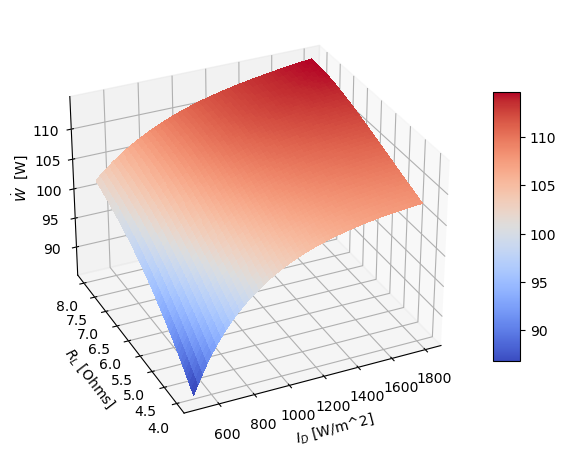

In [59]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
fontsize=10
fig = plt.figure()
ax = plt.axes(projection = '3d')
fig.set_size_inches(7,7)
surf = ax.plot_surface(ID_varGr, RL_varGr, P_varGr*Wdmed, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$I_D$ [W/m^2]', fontsize = fontsize)
ax.set_ylabel(r'$R_L$ [Ohms]', fontsize = fontsize)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\dot{W}$  [W]', fontsize = fontsize, rotation = 90)
fig.colorbar(surf, shrink = 0.5, aspect =10)
ax.view_init(30, 245)
plt.show()
fig.savefig('figures/fig3part1_2h.pdf')

## Task 1.3

In [60]:
#Build new NN
model = keras.Sequential([
    keras.layers.Dense(6,  activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(12, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8,  activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])

rms = keras.optimizers.RMSprop(0.02)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [61]:
# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model')

Restoring model weights from the end of the best epoch
Epoch 00557: early stopping
best epoch =  477
smallest loss = 0.04183197021484375


In [62]:
rms = keras.optimizers.RMSprop(0.01)
model.compile(loss='mean_absolute_error',optimizer=rms)
historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)
loss_hist = historyData.history['loss']
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Restoring model weights from the end of the best epoch
Epoch 00127: early stopping
best epoch =  47
smallest loss = 0.03333258256316185


In [63]:
rms = keras.optimizers.RMSprop(0.005)
model.compile(loss='mean_absolute_error',optimizer=rms)
historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)
loss_hist = historyData.history['loss']
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Restoring model weights from the end of the best epoch
Epoch 00254: early stopping
best epoch =  174
smallest loss = 0.02295932173728943


In [64]:
rms = keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_absolute_error',optimizer=rms)
historyData = model.fit(x_train,y_train,epochs=1200,callbacks=[es],verbose=0)
loss_hist = historyData.history['loss']
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Restoring model weights from the end of the best epoch
Epoch 00396: early stopping
best epoch =  316
smallest loss = 0.016569457948207855


calcualated mae on training predictions  0.018427763741527513


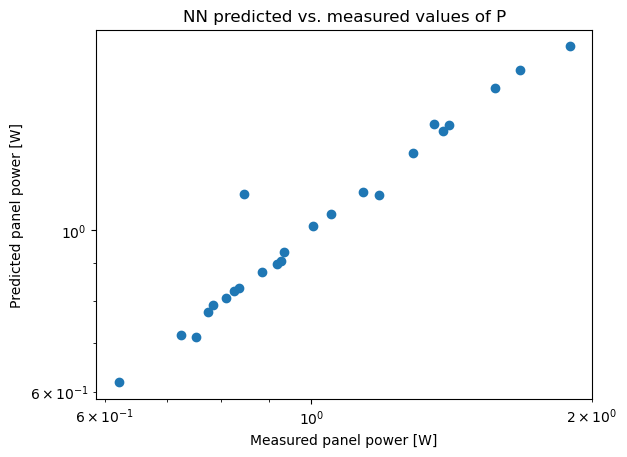

In [65]:
#Predict train values
trainpred = model.predict(x_train)

maetrain= np.abs(np.subtract(y_train, trainpred)).mean() 
print ('calcualated mae on training predictions ', maetrain)

#Plot
fig = plt.figure()
plt.scatter(y_train[:,1], trainpred[:,1])
plt.title(r'NN predicted vs. measured values of P')
plt.ylabel(r'Predicted panel power [W]')
plt.xlabel(r'Measured panel power [W]')
plt.loglog()
#plt.xlim(xmax = 1000, xmin = 10)
#plt.ylim(ymax = 1000, ymin = 10)
plt.show()
fig.savefig('figures/fig3part1_3e.pdf')